# 1. Project: Predict whether a client will agree to join the new product being marketed by the banking institution.

# 2. Library import and data loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading CSV file with the competition data
df = pd.read_csv('bank-sampled-9K.csv', index_col=False)

# 3. Data Analysis, Preparation and Wrangling

In [3]:
df.drop('Unnamed: 0',axis=1, inplace=True)

# Validation of number of records and variables
print("Competition data has {} records and {} variables".format(*df.shape))

Competition data has 9000 records and 17 variables


In [4]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
2,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,137,1,-1,0,unknown,no
3,53,technician,married,secondary,no,6,yes,no,unknown,5,may,517,1,-1,0,unknown,no
4,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,38,1,-1,0,unknown,no
5,60,retired,married,primary,no,60,yes,no,unknown,5,may,219,1,-1,0,unknown,no
6,40,retired,married,primary,no,0,yes,yes,unknown,5,may,181,1,-1,0,unknown,no
7,36,admin.,divorced,secondary,no,506,yes,no,unknown,5,may,577,1,-1,0,unknown,no
8,44,services,divorced,secondary,no,2586,yes,no,unknown,5,may,160,1,-1,0,unknown,no
9,54,blue-collar,married,secondary,no,1291,yes,no,unknown,5,may,266,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [6]:
# Dropping 'duration'
df.drop(columns = 'duration', inplace = True)

df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
2,29,admin.,single,secondary,no,390,yes,no,unknown,5,may,1,-1,0,unknown,no
3,53,technician,married,secondary,no,6,yes,no,unknown,5,may,1,-1,0,unknown,no
4,57,blue-collar,married,primary,no,52,yes,no,unknown,5,may,1,-1,0,unknown,no
5,60,retired,married,primary,no,60,yes,no,unknown,5,may,1,-1,0,unknown,no
6,40,retired,married,primary,no,0,yes,yes,unknown,5,may,1,-1,0,unknown,no
7,36,admin.,divorced,secondary,no,506,yes,no,unknown,5,may,1,-1,0,unknown,no
8,44,services,divorced,secondary,no,2586,yes,no,unknown,5,may,1,-1,0,unknown,no
9,54,blue-collar,married,secondary,no,1291,yes,no,unknown,5,may,1,-1,0,unknown,no


In [7]:
# Merge day - month
from datetime import datetime as dt

last_date = "18 Nov, 2010"
dt_1 = dt.strptime(last_date, "%d %b, %Y")  # Convert to datetime

df['month'] = df['month'].apply(lambda x : x.capitalize())
df['date'] = df['day'].astype(str) + " " + df['month'] + ", 2010"

# Create last_contact => how many days ago was the last contact
df['last_contact'] = df['date'].apply(lambda x : (dt_1 - dt.strptime(x, "%d %b, %Y")).days)

#Drop the unnecessary columns
df.drop(columns = {'month','date', 'day'}, axis = 1, inplace = True)


Summary Statistics

In [8]:
df.describe()

,age,balance,campaign,pdays,previous,last_contact
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.035667,1372.970222,2.767667,39.906444,0.609556,150.289000
std,10.561698,3363.690197,3.011022,99.440498,3.499115,74.721977
min,18.000000,-4057.000000,1.000000,-1.000000,0.000000,-42.000000
25%,33.000000,68.000000,1.000000,-1.000000,0.000000,104.000000
50%,39.000000,450.000000,2.000000,-1.000000,0.000000,166.000000
75%,48.000000,1453.250000,3.000000,-1.000000,0.000000,193.000000
max,90.000000,102127.000000,51.000000,831.000000,275.000000,316.000000


Select categorical columns

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'campaign', 'pdays', 'previous', 'poutcome', 'y',
       'last_contact'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           9000 non-null   int64 
 1   job           9000 non-null   object
 2   marital       9000 non-null   object
 3   education     9000 non-null   object
 4   default       9000 non-null   object
 5   balance       9000 non-null   int64 
 6   housing       9000 non-null   object
 7   loan          9000 non-null   object
 8   contact       9000 non-null   object
 9   campaign      9000 non-null   int64 
 10  pdays         9000 non-null   int64 
 11  previous      9000 non-null   int64 
 12  poutcome      9000 non-null   object
 13  y             9000 non-null   object
 14  last_contact  9000 non-null   int64 
dtypes: int64(6), object(9)
memory usage: 1.0+ MB


In [11]:
#select columns
categorical_variables = df.select_dtypes('object').columns #Review this line in Andrea Notebook
print(categorical_variables)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome', 'y'],
      dtype='object')


In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,last_contact
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no,197
1,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no,197
2,29,admin.,single,secondary,no,390,yes,no,unknown,1,-1,0,unknown,no,197
3,53,technician,married,secondary,no,6,yes,no,unknown,1,-1,0,unknown,no,197
4,57,blue-collar,married,primary,no,52,yes,no,unknown,1,-1,0,unknown,no,197


Create dummy variables for each categorical feature

In [13]:
#Easiest way to create dummie encoding - convert all categorical values
df1 = pd.get_dummies(df, drop_first=True)
df1.head()

,age,balance,campaign,pdays,previous,last_contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,1,-1,0,197,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,33,2,1,-1,0,197,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
2,29,390,1,-1,0,197,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,53,6,1,-1,0,197,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,57,52,1,-1,0,197,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [14]:
# df1 = pd.get_dummies(df, prefix = 'job', columns=['job'])
# df1 = pd.get_dummies(df, prefix = 'marital', columns=['marital'])
# df1 = pd.get_dummies(df, prefix = 'education', columns=['education'])
# df1 = pd.get_dummies(df, prefix = 'default', columns=['default'])
# df1 = pd.get_dummies(df, prefix = 'housing', columns=['housing'])
# df1 = pd.get_dummies(df, prefix = 'loan', columns=['loan'])
# df1 = pd.get_dummies(df, prefix = 'contact', columns=['contact'])
# df1 = pd.get_dummies(df, prefix = 'poutcome', columns=['poutcome'])
#y_target = pd.get_dummies(df['y'], prefix = 'y', drop_first=True) REVISAR Codigo Andrea si convierte response columns "y" a Dummie Variable. Solo convertir features.

In [15]:
#df.head()

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  9000 non-null   int64
 1   balance              9000 non-null   int64
 2   campaign             9000 non-null   int64
 3   pdays                9000 non-null   int64
 4   previous             9000 non-null   int64
 5   last_contact         9000 non-null   int64
 6   job_blue-collar      9000 non-null   uint8
 7   job_entrepreneur     9000 non-null   uint8
 8   job_housemaid        9000 non-null   uint8
 9   job_management       9000 non-null   uint8
 10  job_retired          9000 non-null   uint8
 11  job_self-employed    9000 non-null   uint8
 12  job_services         9000 non-null   uint8
 13  job_student          9000 non-null   uint8
 14  job_technician       9000 non-null   uint8
 15  job_unemployed       9000 non-null   uint8
 16  job_unknown          900

# 4.Feature Selection and Scaling

In [17]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, VarianceThreshold, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [18]:
X = df1.drop(columns = 'y_yes')
y = df1['y_yes']

In [19]:
### Logistic Regression

In [20]:
logreg_selector = SelectFromModel(estimator = LogisticRegression(max_iter = 5000))
logreg_selector.fit(X, y)
logreg_selector.estimator_.coef_

array([[-5.06935816e-03,  1.84016788e-05, -1.25751184e-01,
        -1.82293410e-03, -1.70223725e-04,  7.03799906e-04,
        -8.12905736e-02, -2.13315697e-01, -3.14365393e-01,
        -1.82422464e-01,  5.96304269e-01, -1.34537887e-01,
        -1.86795788e-01,  1.71503559e-01, -1.52681583e-01,
         4.04143005e-03, -5.90240926e-04, -2.62431960e-01,
         5.69310009e-02,  1.28420666e-02,  2.09706541e-01,
         6.71990089e-02, -1.02437623e-01, -5.83810718e-01,
        -6.63973191e-01, -1.19880924e-01, -1.05924526e+00,
        -1.60800356e-01,  1.78714182e+00, -8.15905447e-01]])

In [21]:
logreg_selector.threshold_

0.2691230235063735

In [22]:
logreg_selector.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True,  True])

In [23]:
X_logreg = logreg_selector.transform(X)
X_logreg.shape

(9000, 7)

In [24]:
### Linear SVM - Regularization 0.001

In [25]:
from sklearn.svm import LinearSVC

In [26]:
svm_selector = SelectFromModel(estimator=LinearSVC(C=0.001, dual=False))
svm_selector.fit(X, y)
svm_selector.estimator_.coef_

array([[-4.33766292e-03,  5.86834275e-06, -2.59201267e-02,
        -2.71361059e-04,  1.50576697e-03, -1.04048959e-04,
        -3.76073160e-02, -3.55821635e-02, -4.84191654e-02,
        -4.38449960e-02,  1.16665882e-01, -2.64752269e-02,
        -3.57895763e-02,  2.28341925e-02, -3.75743984e-02,
        -9.81509089e-04, -4.21211068e-04, -5.95086574e-02,
        -3.33029590e-02, -3.65109825e-02,  6.11048372e-03,
         7.39124025e-03, -1.51904974e-02, -1.40847984e-01,
        -8.33368810e-02, -8.71586431e-03, -1.11470666e-01,
        -3.11499995e-02,  3.01653637e-01, -2.00315479e-01]])

In [27]:
svm_selector.threshold_

0.04912819340148622

In [28]:
svm_selector.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False,  True,
       False,  True,  True])

In [29]:
X_svm = logreg_selector.transform(X)
X_svm.shape
X_svm = pd.DataFrame(X_svm)

Export feature dataframe into the file feature1.csv

In [30]:
X_svm.to_csv('feature1.csv', index = False)

### SelectKBest

In [31]:
kbest_selector = SelectKBest(score_func=mutual_info_classif, k=10)
kbest_selector.fit(X, y)

SelectKBest(score_func=<function mutual_info_classif at 0x000002A2EFE6DEA0>)

In [32]:
kbest_selector.get_support()

array([ True, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False,  True,  True])

In [33]:
X_kbest = kbest_selector.transform(X)

In [34]:
X_kbest.shape
X_kbest = pd.DataFrame(X_kbest)

In [35]:
X_kbest.to_csv('feature2.csv', index = False)

In [36]:
svm_selector.get_support() == logreg_selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [37]:
X.columns[svm_selector.get_support()]

Index(['job_retired', 'marital_married', 'housing_yes', 'loan_yes',
       'contact_unknown', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [38]:
X.columns[logreg_selector.get_support()]

Index(['job_housemaid', 'job_retired', 'housing_yes', 'loan_yes',
       'contact_unknown', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

### Scaling

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

scaler = RobustScaler()

In [40]:
X_svm_scaled = scaler.fit_transform(X_svm)
X_logreg_scaled = scaler.fit_transform(X_logreg)

# 5. Classifier Modeling

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

### For SVM selected features

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_svm_scaled, y, test_size=0.25, random_state=42)

In [43]:
classifiers = {
    'Naive Bayes': Pipeline([('classifier', GaussianNB())]),
    'KNN': Pipeline([('classifier', KNeighborsClassifier())]),
    'Decision Tree': Pipeline([('classifier', DecisionTreeClassifier(max_depth = 5))]), # Modify there the parameters to the ones in demo
    'Random Forest': Pipeline([('classifier', RandomForestClassifier(max_depth =5 , n_estimators= 1000))]),
}

In [44]:
num_folds = 3
best_classifier = None
best_accuracy = 0

In [45]:
# Here we loop through the classifiers
for name, clf in classifiers.items():
    # Cross validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=num_folds)

    # accuracy for comparing the classifiers
    mean_accuracy = cv_scores.mean()

    print(f'{name} Mean Accuracy: {mean_accuracy}')

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_classifier = clf

Naive Bayes Mean Accuracy: 0.8711111111111111
KNN Mean Accuracy: 0.8934814814814814
Decision Tree Mean Accuracy: 0.8946666666666667
Random Forest Mean Accuracy: 0.8946666666666667


In [46]:
best_classifier.fit(X_train, y_train)

test_accuracy = best_classifier.score(X_test, y_test)
print(f'Best Classifier: {best_classifier}')
print(f'Best Classifier Test Accuracy:{test_accuracy}')

Best Classifier: Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=5))])
Best Classifier Test Accuracy:0.8955555555555555


### Logistic Regression features

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_logreg_scaled, y, test_size=0.25, random_state=42)

In [49]:
num_folds = 3
best_classifier = None
best_accuracy = 0

In [50]:
# Here we loop through the classifiers
for name, clf in classifiers.items():
    # Cross validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=num_folds)

    # accuracy for comparing the classifiers
    mean_accuracy = cv_scores.mean()

    print(f'{name} Mean Accuracy: {mean_accuracy}')

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_classifier = clf

Naive Bayes Mean Accuracy: 0.8711111111111111
KNN Mean Accuracy: 0.8934814814814814
Decision Tree Mean Accuracy: 0.8946666666666667
Random Forest Mean Accuracy: 0.8946666666666667


In [51]:
best_classifier.fit(X_train, y_train)

test_accuracy = best_classifier.score(X_test, y_test)
print(f'Best Classifier: {best_classifier}')
print(f'Best Classifier Test Accuracy: {test_accuracy}')

Best Classifier: Pipeline(steps=[('classifier', DecisionTreeClassifier(max_depth=5))])
Best Classifier Test Accuracy: 0.8955555555555555


# 6. Classifier Model – The Second Try

In [52]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler

In [53]:
#Convert all categorical values
df2 = pd.get_dummies(df, drop_first=True)
df2.head()

,age,balance,campaign,pdays,previous,last_contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,1,-1,0,197,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,33,2,1,-1,0,197,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
2,29,390,1,-1,0,197,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,53,6,1,-1,0,197,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,57,52,1,-1,0,197,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  9000 non-null   int64
 1   balance              9000 non-null   int64
 2   campaign             9000 non-null   int64
 3   pdays                9000 non-null   int64
 4   previous             9000 non-null   int64
 5   last_contact         9000 non-null   int64
 6   job_blue-collar      9000 non-null   uint8
 7   job_entrepreneur     9000 non-null   uint8
 8   job_housemaid        9000 non-null   uint8
 9   job_management       9000 non-null   uint8
 10  job_retired          9000 non-null   uint8
 11  job_self-employed    9000 non-null   uint8
 12  job_services         9000 non-null   uint8
 13  job_student          9000 non-null   uint8
 14  job_technician       9000 non-null   uint8
 15  job_unemployed       9000 non-null   uint8
 16  job_unknown          900

In [55]:
# Check for null again
df2.isnull().sum()

age                    0
balance                0
campaign               0
pdays                  0
previous               0
last_contact           0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
y_yes                  0
dtype: int64

### Define the predictors/features (X) and outcome/predictions (Y)

In [56]:
X2 = df2.drop(['y_yes'], axis=1)
y2 = df2['y_yes']
X.shape

(9000, 30)

In [109]:
variable_values = df2['y_yes'].unique()
print(variable_values)

[0 1]


In [57]:
feature_importance_threshold = 0.057  # Set your desired thresholdsfm = SelectFromModel(estimator=rf_classifier, threshold=feature_importance_threshold)

In [58]:
# Create an instance of SelectFromModel using RandomForestClassifier
method2 = SelectFromModel(estimator=RandomForestClassifier(max_depth =5 , n_estimators= 10),threshold=feature_importance_threshold)

In [59]:
# Fit the method on your data
method2.fit(X2, y2)

SelectFromModel(estimator=RandomForestClassifier(max_depth=5, n_estimators=10),
                threshold=0.057)

In [60]:
feature_importances = method2.estimator_.feature_importances_
print(feature_importances > 0.05)

[ True False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False  True False  True  True]


In [61]:
# Get the selected features
selected_features = X2.columns[method2.get_support()]

In [62]:
# Print the selected features and their count
print("Selected Features:")
for feature in selected_features:
    print(feature)
print("Number of selected features:", len(selected_features))

Selected Features:
age
last_contact
contact_unknown
poutcome_success
poutcome_unknown
Number of selected features: 5



### Robust Scaling

In [63]:
scaler = RobustScaler()

In [64]:
X_scaled  = scaler.fit_transform(X[selected_features])

### Export feature dataframe into csv file

In [65]:
# Create a DataFrame with scaled selected features
feature_df = pd.DataFrame(X_scaled, columns=selected_features)

# Save the feature dataframe to a CSV file named "feature2.csv"
feature_df.to_csv('feature2.csv', index=False)

### Implemented all the clasifiers stated in step 5

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

classifiers = {
    'Naive Bayes': Pipeline([('classifier', GaussianNB())]),
    'KNN': Pipeline([('classifier', KNeighborsClassifier())]),
    'Decision Tree': Pipeline([('classifier', DecisionTreeClassifier(max_depth = 5))]), # Modify there the parameters to the ones in demo
    'Random Forest': Pipeline([('classifier', RandomForestClassifier(max_depth =5 , n_estimators= 1000))]),
}

num_folds = 3
best_classifier = None
best_accuracy = 0

# Here we loop through the classifiers
for name, clf in classifiers.items():
    # Cross validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=num_folds)

    # accuracy for comparing the classifiers
    mean_accuracy = cv_scores.mean()

    print(f'{name} Mean Accuracy: {mean_accuracy}')

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_classifier = clf

best_classifier.fit(X_train, y_train)

test_accuracy = best_classifier.score(X_test, y_test)
print(f'Best Classifier: {best_classifier}')
print(f'Best Classifier Test Accuracy:{test_accuracy}')

Naive Bayes Mean Accuracy: 0.8930370370370371
KNN Mean Accuracy: 0.8854814814814814
Decision Tree Mean Accuracy: 0.8922962962962964
Random Forest Mean Accuracy: 0.8954074074074074
Best Classifier: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=1000))])
Best Classifier Test Accuracy:0.8968888888888888


In [67]:
### Logistic Regression features

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

num_folds = 3
best_classifier = None
best_accuracy = 0

# Here we loop through the classifiers
for name, clf in classifiers.items():
    # Cross validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=num_folds)

    # accuracy for comparing the classifiers
    mean_accuracy = cv_scores.mean()

    print(f'{name} Mean Accuracy: {mean_accuracy}')

    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_classifier = clf

best_classifier.fit(X_train, y_train)

# Calculating and printing the training accuracy
train_accuracy = best_classifier.score(X_train, y_train)
print(f'Best Classifier Training Accuracy: {train_accuracy}')

print()
# Calculating and printing the test accuracy
test_accuracy = best_classifier.score(X_test, y_test)
print(f'Best Classifier Test Accuracy: {best_classifier}')
print(f'Best Classifier Test Accuracy: {test_accuracy}')

Naive Bayes Mean Accuracy: 0.8930370370370371
KNN Mean Accuracy: 0.8854814814814814
Decision Tree Mean Accuracy: 0.8925925925925927
Random Forest Mean Accuracy: 0.8954074074074074
Best Classifier Training Accuracy: 0.8979259259259259

Best Classifier Test Accuracy: Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=5, n_estimators=1000))])
Best Classifier Test Accuracy: 0.8964444444444445


# 7. Model Evaluation

In [68]:
# PENDING
# You should analyze the difference in the accuracy values obtained between the one obtained at step 5 and 6. You should also comment on the amount of features selected between the two results.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [70]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [71]:
# Train a RandomForestClassifier
clf = RandomForestClassifier(max_depth =5 , n_estimators= 1000)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000)

In [72]:
# Make predictions
y_pred = clf.predict(X_test)

### Confusion Matrix

In [73]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1581   27]
 [ 155   37]]


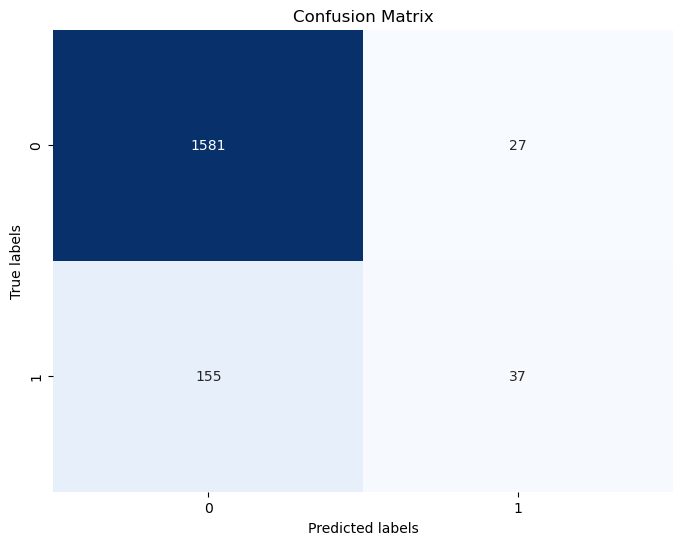

In [74]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [75]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1608
           1       0.58      0.19      0.29       192

    accuracy                           0.90      1800
   macro avg       0.74      0.59      0.62      1800
weighted avg       0.88      0.90      0.88      1800



### ROC Curve

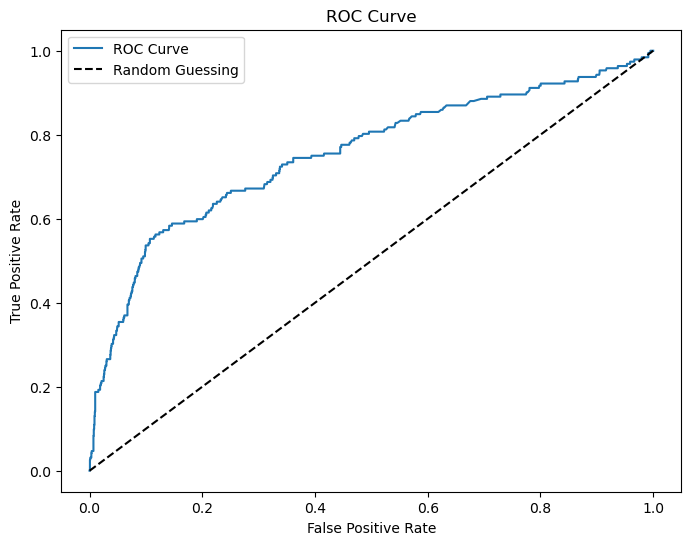

In [76]:
# ROC Curve
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [77]:
#Analysis

# 8. Prediction

In [89]:
inputData = [[45, 8000, 'blue-collar', 'married','yes', 'cellular', 12, 300, 45, 'success'],
            [45, 8000, 'retired','divorced', 'yes', 'telephone', 2, 1, 1, 'success'],
            [45, 8000, 'unknown', 'unknown','no', 'telephone', 1, 1, 200, 'unknown'],
            [45, 8000, 'students','single', 'no', 'cellular', 3, 90, 180, 'success']]

df3 = pd.DataFrame(inputData, columns = ['age', 'balance','job', 'marital','housing','contact', 
                                       'campaign','pdays','last_contact','poutcome'])

In [79]:
df_cat = pd.get_dummies(df3, drop_first = False)

In [81]:
df_cat.columns


Index(['age', 'balance', 'campaign', 'pdays', 'last_contact',
       'job_blue-collar', 'job_retired', 'job_students', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [83]:
df2.columns

Index(['age', 'balance', 'campaign', 'pdays', 'previous', 'last_contact',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'y_yes'],
      dtype='object')

In [90]:
print(set(df2.columns) - set(df_cat.columns))

{'poutcome_other', 'job_housemaid', 'job_technician', 'education_tertiary', 'job_services', 'job_student', 'job_management', 'loan_yes', 'default_yes', 'job_self-employed', 'education_secondary', 'education_unknown', 'job_entrepreneur', 'previous', 'job_unemployed', 'y_yes', 'contact_unknown'}


In [91]:
df_aux = pd.DataFrame(columns = df2.columns )

In [93]:
df_aux[df_cat.columns] = df_cat

In [94]:
df_aux.head()

,age,balance,campaign,pdays,previous,last_contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes,job_students,marital_divorced,marital_unknown,housing_no,contact_cellular
0,45,8000,12,300,NaN,45,1,NaN,NaN,NaN,...,NaN,NaN,1,0,NaN,0,0,0,0,1
1,45,8000,2,1,NaN,1,0,NaN,NaN,NaN,...,NaN,NaN,1,0,NaN,0,1,0,0,0
2,45,8000,1,1,NaN,200,0,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,1,1,0
3,45,8000,3,90,NaN,180,0,NaN,NaN,NaN,...,NaN,NaN,1,0,NaN,1,0,0,1,1


In [95]:
excl_cols = set(df2.columns) - set(df_cat.columns)

In [97]:
df_aux[list(excl_cols)] = 0

In [98]:
df_aux.head()

,age,balance,campaign,pdays,previous,last_contact,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes,job_students,marital_divorced,marital_unknown,housing_no,contact_cellular
0,45,8000,12,300,0,45,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,45,8000,2,1,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,45,8000,1,1,0,200,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
3,45,8000,3,90,0,180,0,0,0,0,...,0,0,1,0,0,1,0,0,1,1


In [119]:
X_new = df_aux.filter(selected_features, axis = 1)


In [120]:
df_scaled = scaler.transform(X_new)

In [121]:
y_new_predicted = clf.predict(df_scaled)

In [122]:
y_new_predicted

array([1, 1, 0, 1], dtype=uint8)

### Finfings and analysis of results 

In [124]:
feature_importances = clf.feature_importances_
importance_df = pd.DataFrame({'Feature': X_new.columns, 'Importance': feature_importances})


importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
            Feature  Importance
3  poutcome_success    0.449762
0               age    0.226817
1      last_contact    0.196187
2   contact_unknown    0.073870
4  poutcome_unknown    0.053364


Based on the predictive results for this new data and the model's feature importance, we recommend that the management focus marketing campaigns on customers who have previously subscribed to a term deposit. Additionally, at an operational level, we advise the management to reinforce the process of recording the outcomes of previous campaigns.

It's worth noting that the customer information for the record predicted as 'No' shows atypical characteristics, such as an unusual age value and a last contact that occurred 200 days ago. However, the number of days does not seem to influence the prediction for the last record, where the customer was contacted 180 days prior. This discrepancy might be attributed to the outcome having a value of 'success.'  

In [140]:
# To review y_yes by values of p_outcome
result = df[df2['y_yes'] == 0]
result.head()


,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,y,last_contact
0,58,management,married,tertiary,no,2143,yes,no,unknown,1,-1,0,unknown,no,197
1,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,1,-1,0,unknown,no,197
2,29,admin.,single,secondary,no,390,yes,no,unknown,1,-1,0,unknown,no,197
3,53,technician,married,secondary,no,6,yes,no,unknown,1,-1,0,unknown,no,197
4,57,blue-collar,married,primary,no,52,yes,no,unknown,1,-1,0,unknown,no,197


In [133]:
result['poutcome'].value_counts()

unknown    668
success    191
failure    119
other       53
Name: poutcome, dtype: int64

In [138]:
result2 = df2[df2['y_yes'] == 0]
result3 = result2[selected_features]

In [139]:
result3.describe()

,age,last_contact,contact_unknown,poutcome_success,poutcome_unknown
count,7969.000000,7969.000000,7969.000000,7969.000000,7969.000000
mean,40.935500,150.551387,0.311331,0.012674,0.839503
std,10.097857,73.336100,0.463067,0.111871,0.367089
min,18.000000,-42.000000,0.000000,0.000000,0.000000
25%,33.000000,107.000000,0.000000,0.000000,1.000000
50%,39.000000,166.000000,0.000000,0.000000,1.000000
75%,48.000000,191.000000,1.000000,0.000000,1.000000
max,83.000000,316.000000,1.000000,1.000000,1.000000


In [141]:
result2 = df2[df2['y_yes'] == 1]
result3 = result2[selected_features]

In [143]:
result3.describe()

,age,last_contact,contact_unknown,poutcome_success,poutcome_unknown
count,1031.000000,1031.000000,1031.000000,1031.000000,1031.000000
mean,41.809893,148.260912,0.103783,0.185257,0.647915
std,13.605565,84.684594,0.305127,0.388694,0.477852
min,18.000000,-42.000000,0.000000,0.000000,0.000000
25%,32.000000,92.500000,0.000000,0.000000,0.000000
50%,38.000000,162.000000,0.000000,0.000000,1.000000
75%,52.000000,202.000000,0.000000,0.000000,1.000000
max,90.000000,315.000000,1.000000,1.000000,1.000000


For the provided data the mean and standard deviations for both age, and last_contact do not present significant difference.  

In general, we would suggest management to incentivate the recording of the data after each call to decrease the unknown values, as we believe that this can improve the model. 